In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.power import NormalIndPower


## Checklist
*Fill this table appropriately as you progress in your tasks:*


|**Section**|**Completion**|
|-|-|
|**Section 1**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|**Section 2**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|**Section 3**| **Multi-Armed Bandit (MAB)** |

---
# Introduction

Welcome! As a budding Data Scientist, you've been entrusted with the exciting opportunity to dive into the realms of Data Science and unravel valuable insights that will steer our organization towards success. Your efforts have the power to shape decision-making processes and position you as a key player in our team.

We're committed to providing everyone with an equal chance to showcase their talents. This guided assignment is designed not only to evaluate your fit within our dynamic team but also to help you grasp the type of impactful work you'll be contributing to as an intern.  We're confident that, with your hard work, you'll not only meet but exceed expectations. Let's get started! &#x1F4AA;

This is a practical exercise that will test your analytical & programming skills as well as your understanding of various components of the analytics life cycle. **You would be required to share an iPython notebook (`.ipynb` format) and a Presentation document (`.pptx` format) uploaded to a folder in Google drive and shared as a "Google Drive link" which has viewer access to everyone.**

**Note:** You will not be able to edit this file directly, so make a copy of it on your local machine or in Google Colab beforing answering different sections of this assessment.

The final notebook shouldn't have the questions, it should only have appropriate headings for each section/sub-section and the questions should be correctly numbered.

---
# Instructions
Please read carefully:
- **Submit 1 Google drive link with all the answers. The submitted Google Colab notebook/PPT's name should be in `<your_full_name>_<date_of_submission>` format.**
- **Your code, comments & output should be present in the colab notebook. Please make sure that all the output code and text are organized and readable in the submitted Google Colab notebook.**
- You may not consult with any other person regarding the test. You are allowed to use internet searches, books, or notes you have on hand.
- **The test has 2 sections, both of which are mandatory.** Read the questions carefully and answer accordingly. **Code should be commented properly.**
- The **3rd section** contains resources on some advanced topics for you to go through. You can choose one of these topics and prepare to have a discussion on it during the interview. Please mention your selection in the checklist.
- In case of doubts please make thoughtful assumptions.

**Start your Google Colab notebook with a checklist mentioning the parts you were/were not able to complete.** The table to fill is given at the top. Ideally, all sections must be marked "Completed".


---
# Section 1 - Funnel Analysis

Analysing data and getting actionable insights is one of the very basic but key tasks of any data professional. For the purpose of this assessment, you have been provided with the data. The data for this section can be accessed from [Assignment Data Excel Sheet](https://docs.google.com/spreadsheets/d/1olG6BF2l6vxBLenqbhpgbc4cISQy7siV/edit?usp=sharing&ouid=104708378877685927883&rtpof=true&sd=true) (click on the hyperlink and download the dataset).

**NOTE:** Download the `AssignmentData.xlsx` to your current directory accordingly. Don't make any changes to the data using excel, all data manipulations must be done within this notebook only and your codes must run on the original data file provided to you.

The Microsoft excel file shared with you has 2 sheets:
1. `WorkerFunnel` sheet
2. `ABTest` sheet

`WorkerFunnel` sheet has the details of a garment manufacturing process and the productivity of the employees at the organisation. This data allows you to understand the productivity of the workers over a span of 70 days. The different columns represent the following:

| Column Name| Description|
|-|-|
| Date| Date in MM-DD-YYYY|
| Quarter| A portion of the month. A month was divided into four or five quarters|
| Department| Associated department with the instance|
| Targeted Productivity| Targeted productivity set for each team for each day|
| Overtime| Represents the amount of overtime by each team in minutes|
| No. of Workers| Number of workers in each team|
| Actual Productivity| The actual % of productivity that was delivered by the workers. It ranges from 0-1|



Import data from the `WorkerFunnel` sheet of the `AssignmentData.xlsx` file into a dataframe named `funnel` and perform exploratory analysis.


1. Identify and appropriately handle the missing/blank and duplicate values in the dataset, and explain the logic behind your strategy in a short paragraph.

# SECTION 1

# Data Loading

In [4]:
# Loading the WorkerFunnel file as pandas DataFrame
funnel = pd.read_excel('AssignmentData.xlsx', sheet_name = 'WorkerFunnel')
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN


In [88]:
funnel.loc[216]

Date                     1/13/2015
Quarter                         Q2
Department               Finishing
Targeted Productivity         0.35
Overtime                      2160
No. of Workers                12.0
Actual Productivity        0.95202
Name: 216, dtype: object

In [89]:
funnel.loc[215]

Date                     2015-12-01 00:00:00
Quarter                                   Q2
Department                         Finishing
Targeted Productivity                    0.8
Overtime                                1440
No. of Workers                           8.0
Actual Productivity                  0.24625
Name: 215, dtype: object

In [90]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125
6,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.755167
7,2015-01-01 00:00:00,Q1,Sewing,0.75,6900,57.5,0.753683
8,2015-01-01 00:00:00,Q1,Sewing,0.75,6000,55.0,0.753098
9,2015-01-01 00:00:00,Q1,Sewing,0.75,6900,57.5,0.750428


We have the following two date formats in our date column which will further cause problem during time series analysis.
- **Date formats**
- Y-d-m H:M:S
- m/d/Y
- So we will convert them to same format using pandas.to_datetime function.

In [5]:
# Dates in the date column are in two different formats, so handling those formats and converting the column type to datetime
date1 = pd.to_datetime(funnel['Date'], errors='coerce', format='%Y-%d-%m %H:%M:%S')
date2 = pd.to_datetime(funnel['Date'], errors='coerce', format='%m/%d/%Y')
funnel['Date'] = date1.fillna(date2)

In [8]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1197 non-null   datetime64[ns]
 1   Quarter                1197 non-null   object        
 2   Department             1197 non-null   object        
 3   Targeted Productivity  1197 non-null   float64       
 4   Overtime               1197 non-null   int64         
 5   No. of Workers         1197 non-null   float64       
 6   Actual Productivity    1167 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 65.6+ KB


In [11]:
# Function to describe the dataset
def desc(df):
    des = pd.DataFrame(index=list(df))
    des["type"] = df.dtypes
    des["count"] = df.count()
    des["nunique"] = df.nunique()
    des["%unique"] = des["nunique"] / len(df)*100
    des["null"] = df.isnull().sum()
    des["%null"] = des["null"]/len(df)*100
    des["min"] = df.min()
    des["max"] = df.max()
    return des

In [12]:
desc(funnel)

,type,count,nunique,%unique,null,%null,min,max
Date,datetime64[ns],1197,59,4.928989,0,0.000000,2015-01-01 00:00:00,2015-03-11 00:00:00
Quarter,object,1197,5,0.417711,0,0.000000,Q1,Q5
Department,object,1197,2,0.167084,0,0.000000,Finishing,Sewing
Targeted Productivity,float64,1197,9,0.751880,0,0.000000,0.07,0.8
Overtime,int64,1197,143,11.946533,0,0.000000,0,25920
No. of Workers,float64,1197,61,5.096074,0,0.000000,2.0,89.0
Actual Productivity,float64,1167,866,72.347536,30,2.506266,0.233705,1.120437


# EDA

In [6]:
#separating variables for ease of analysis to those that can
#be considered continuous and categorical  
category = funnel.select_dtypes(include='object')
numerical = funnel.select_dtypes(exclude='object')

In [7]:
for c in category.columns:
    print(f"{c}")
    print(category[c].unique())
    print()

Quarter
['Q1' 'Q2' 'Q3' 'Q4' 'Q5']

Department
['Sewing' 'Finishing']



In [9]:
funnel.Department.value_counts()

Sewing       691
Finishing    506
Name: Department, dtype: int64

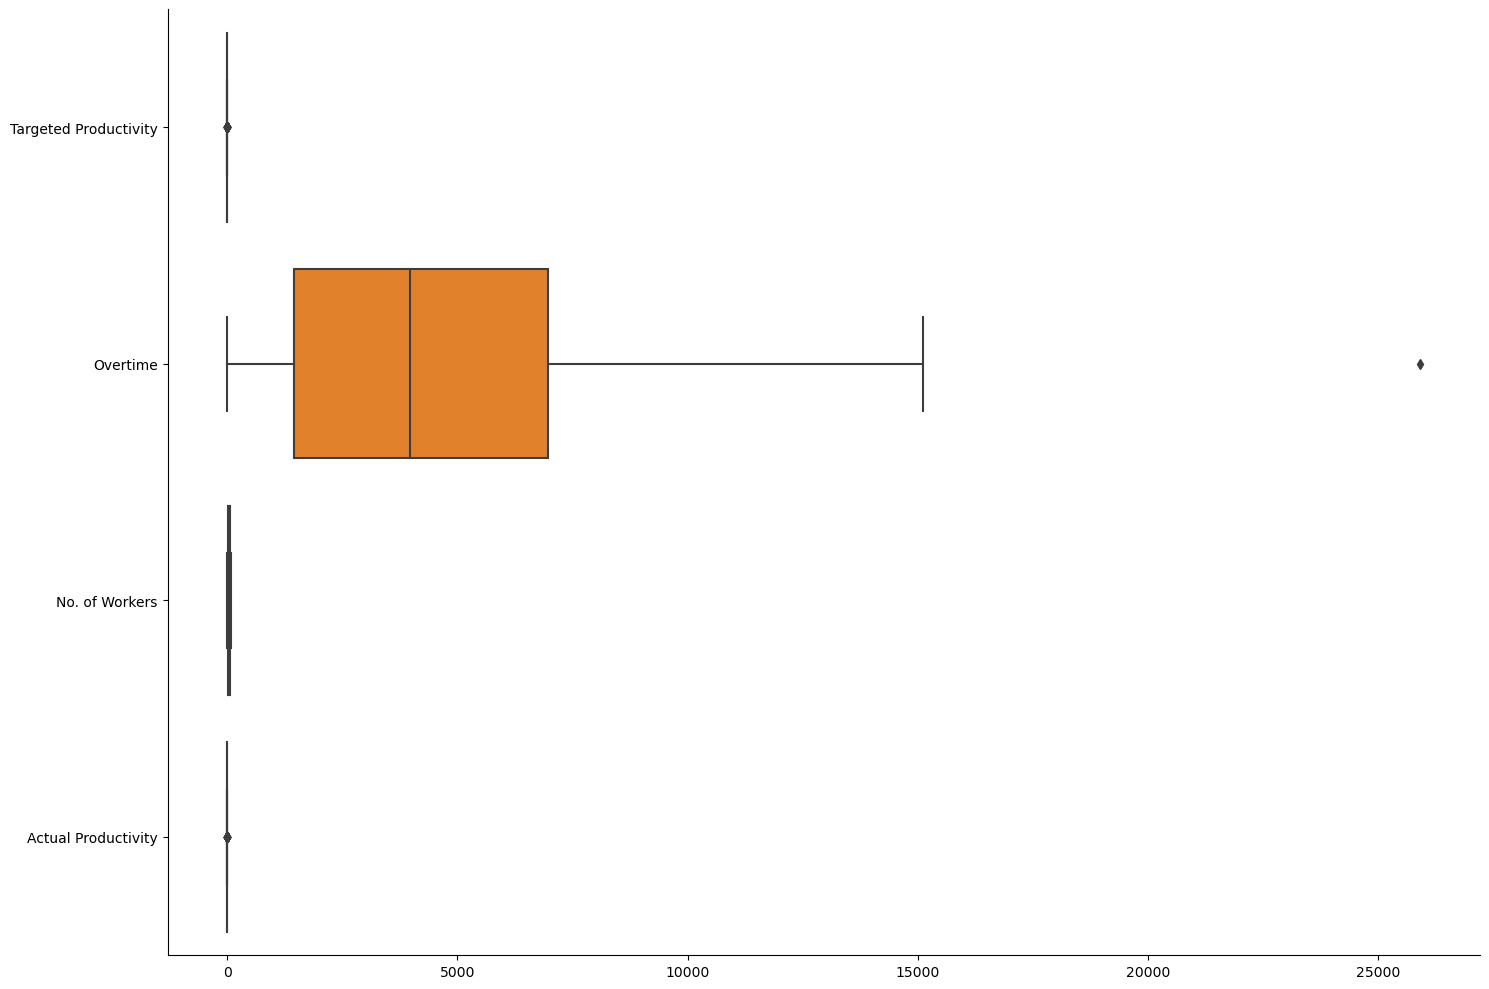

In [10]:
sns.catplot(kind='box', data=numerical, orient='h', height=10, aspect=1.5)

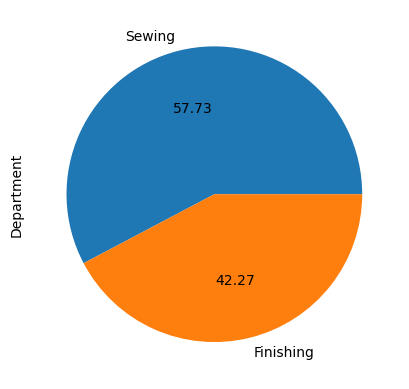

In [13]:
funnel['Department'].value_counts().plot(kind='pie', autopct="%.2f")
plt.show()

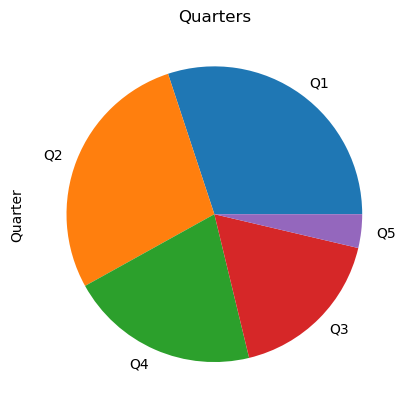

In [14]:
plt.title("Quarters")
funnel['Quarter'].value_counts().plot(kind='pie')
plt.show()

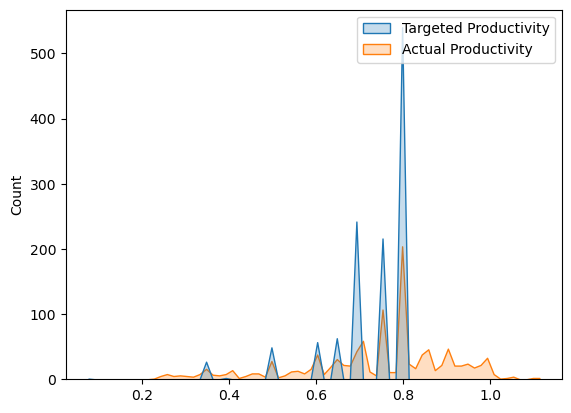

In [16]:
sns.histplot(data=numerical[['Targeted Productivity', 'Actual Productivity']], element='poly')
plt.show()

- We can clearly observe that there is a significant difference between Targeted productivity count and Actual Productivity count for higher productivity
- Max value for Targeted productivity is 0.8 only however actual productivity value ranges between 0.233 and 1.12

In [17]:
funnel['Department'].unique()
department_targeted_productivity=pd.crosstab(funnel['Department'],funnel['Targeted Productivity'])
department_targeted_productivity

Targeted Productivity,0.07,0.35,0.40,0.50,0.60,0.65,0.70,0.75,0.80
Department,,,,,,,,,
Finishing,0,10,1,17,19,25,94,95,245
Sewing,1,17,1,32,38,38,148,121,295


In [19]:
# Around 46% of the people have Actual Productivity >=0.80
len(funnel[funnel["Actual Productivity"]>=0.80])/len(funnel)

0.46115288220551376

In [22]:
funnel['Quarter'].unique()
quarter_target_prod=pd.crosstab(funnel['Quarter'],funnel['Targeted Productivity'])
quarter_target_prod

Targeted Productivity,0.07,0.35,0.40,0.50,0.60,0.65,0.70,0.75,0.80
Quarter,,,,,,,,,
Q1,1,3,2,6,14,15,72,64,183
Q2,0,15,0,14,14,15,43,49,185
Q3,0,3,0,12,13,18,53,20,91
Q4,0,6,0,14,12,9,69,73,65
Q5,0,0,0,3,4,6,5,10,16


In [26]:
df_grouped_sum=funnel.groupby('Quarter',as_index=False)['Actual Productivity'].agg('sum').rename(columns={'Actual Productivity':'actual_productivity_Sum'})
df_grouped_cnt=funnel.groupby('Quarter',as_index=False)['Actual Productivity'].agg('count').rename(columns={'Actual Productivity':'actual_productivity_Count'})

# Merge the codes 
df_grouped=df_grouped_sum.merge(df_grouped_cnt, left_on='Quarter',right_on='Quarter',how='inner')

df_grouped.sort_values('actual_productivity_Sum',ascending=False)
# As you see, the quater 1 has the highest portion among others and quarter 5 has the lowest portion 

,Quarter,actual_productivity_Sum,actual_productivity_Count
0,Q1,264.017726,351
1,Q2,243.078669,327
3,Q4,170.393960,241
2,Q3,144.736862,205
4,Q5,35.379938,43


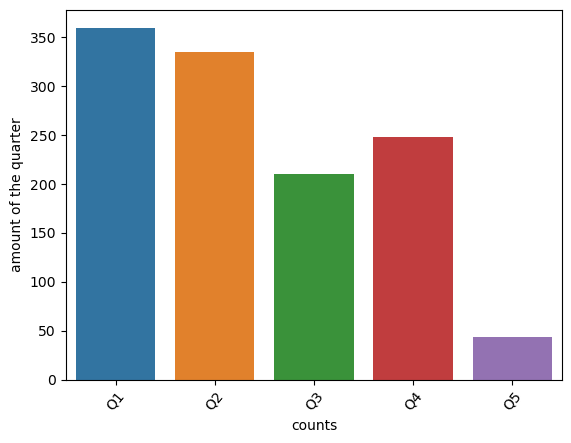

In [27]:
sns.countplot(funnel, x="Quarter")
plt.xlabel('counts')
plt.ylabel('amount of the quarter')
plt.xticks(rotation=50)
plt.show()

<Axes: xlabel='Quarter', ylabel='Actual Productivity'>

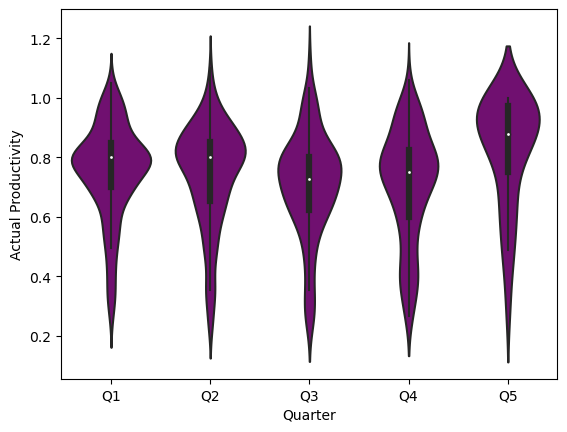

In [28]:
sns.violinplot(funnel, x='Quarter',y='Actual Productivity', color='purple')
#the quarter 3 has the highest actual_productivity among othrs

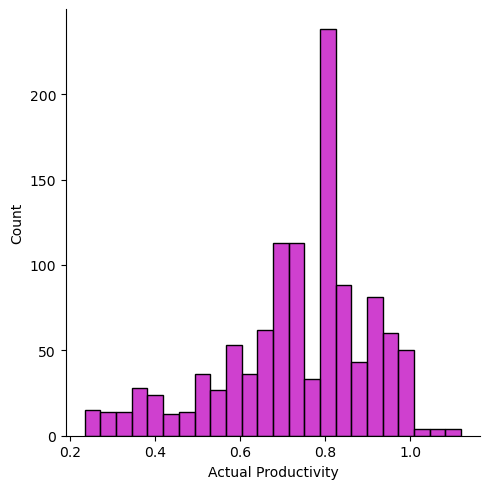

In [31]:
sns.displot(funnel['Actual Productivity'],color='m')
# as we can observe that, the actual productivity near .8 has the highest percent

# SECTION 1 - Ques no 1

# Dealing with Missing values in the Dataset

In [14]:
funnel[funnel["Actual Productivity"].isna()]

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
4,2015-01-01,Q1,Sewing,0.80,1920,56.0,NaN
18,2015-01-01,Q1,Finishing,0.70,1440,12.0,NaN
87,2015-01-06,Q1,Finishing,0.80,1440,8.0,NaN
136,2015-01-08,Q2,Sewing,0.80,10050,58.5,NaN
141,2015-01-08,Q2,Finishing,0.75,1440,8.0,NaN
193,2015-01-12,Q2,Finishing,0.80,1440,8.0,NaN
264,2015-01-15,Q3,Sewing,0.80,10620,59.0,NaN
326,2015-01-19,Q3,Sewing,0.70,10260,57.0,NaN
365,2015-01-21,Q3,Sewing,0.60,6360,34.0,NaN
407,2015-01-24,Q4,Sewing,0.75,10260,57.0,NaN


---
- **Only 2.5% data is missing from the Actual Productivity column.**
- **Also We can clearly observe that our data is missing completely at random.**
- **Therefore applying "Complete Case Analysis" (i.e. deleting missing rows) will be a good option.**

In [32]:
funnel.dropna(inplace=True)
funnel.shape

(1167, 7)

# Analyzing Duplicate Values

In [16]:
funnel.duplicated().sum()

36

In [17]:
duplicates = funnel.duplicated()
funnel[duplicates]

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
3,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570
27,2015-01-03,Q1,Sewing,0.80,7080,59.0,0.800319
31,2015-01-03,Q1,Sewing,0.80,6720,56.0,0.800125
69,2015-01-05,Q1,Sewing,0.80,6780,56.5,0.800684
73,2015-01-05,Q1,Sewing,0.80,7200,32.0,0.800246
75,2015-01-05,Q1,Sewing,0.80,6900,57.5,0.800077
89,2015-01-06,Q1,Sewing,0.80,10620,59.0,0.850502
93,2015-01-06,Q1,Sewing,0.80,10350,57.5,0.800594
97,2015-01-06,Q1,Sewing,0.80,10170,56.5,0.800129
107,2015-01-07,Q1,Sewing,0.80,10620,59.0,0.850502


- **We may swap out duplicate values for alternative values, such the column's mean or median.**
- **Duplicates in the DataFrame can also be eliminated by using the drop duplicates method.**
- **We are dropping the duplicate values because we have very few duplicate values and replacing with alternate values here may change the distribution of data.**

In [33]:
funnel = funnel.drop_duplicates(keep='first')

In [34]:
funnel.shape

(1131, 7)

# Visualizing time series data

In [20]:
#pd.set_option('display.max_rows', 1197)

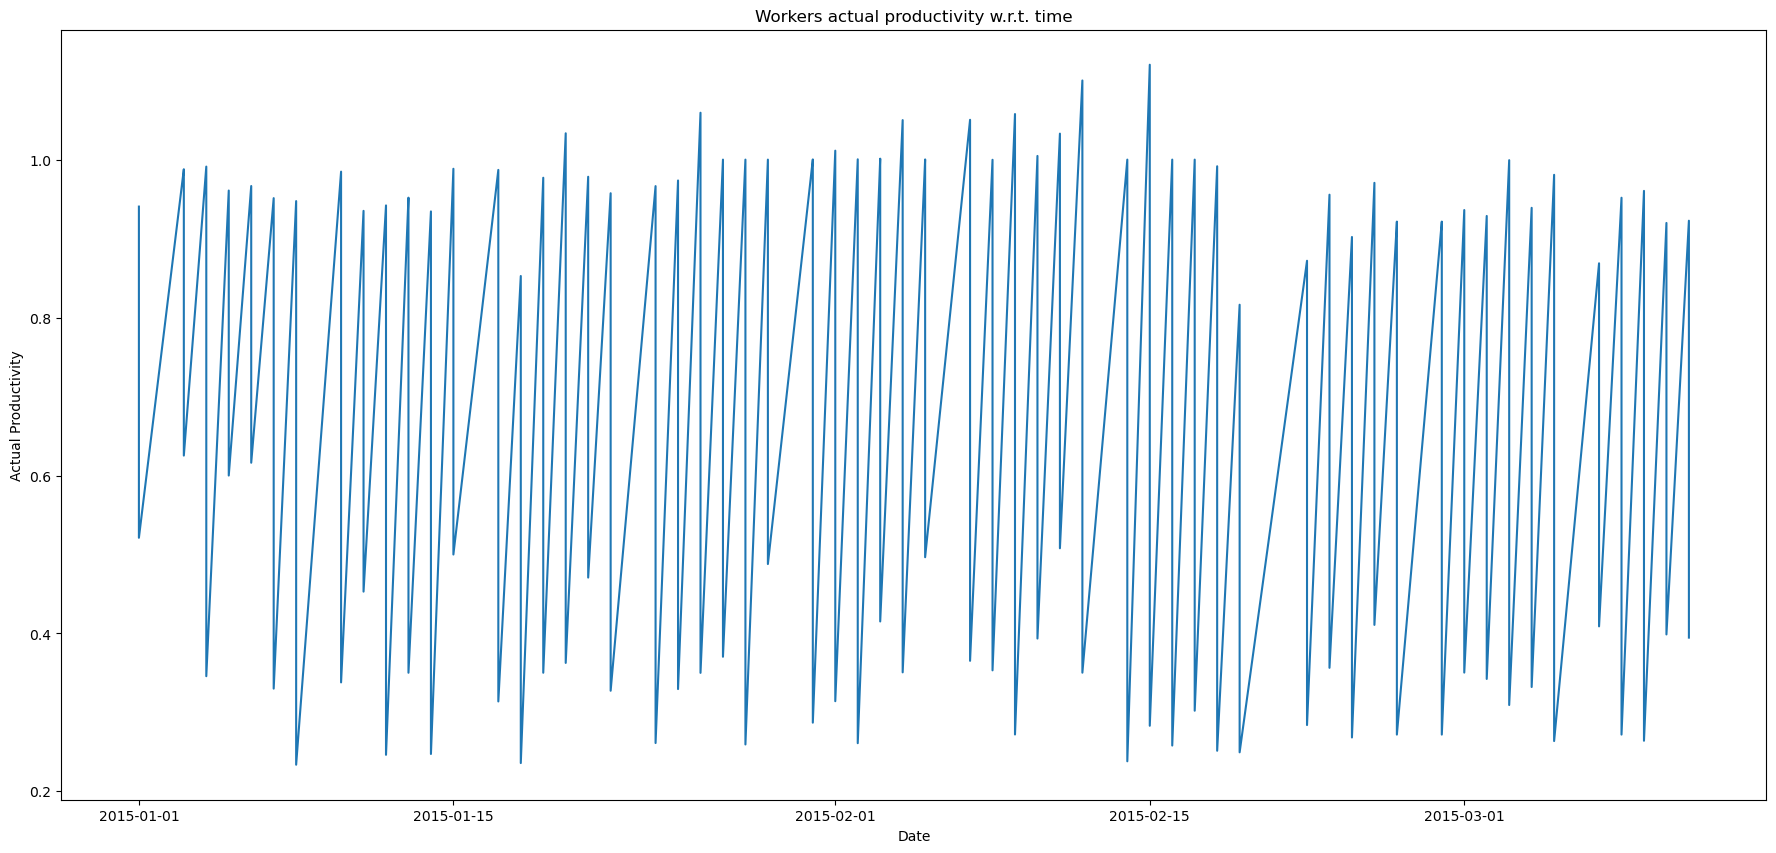

In [23]:
plt.figure(figsize=(22,10))
plt.plot(funnel.Date,funnel["Actual Productivity"])
plt.title("Workers actual productivity w.r.t. time")
plt.xlabel("Date")
plt.ylabel("Actual Productivity")
plt.show()

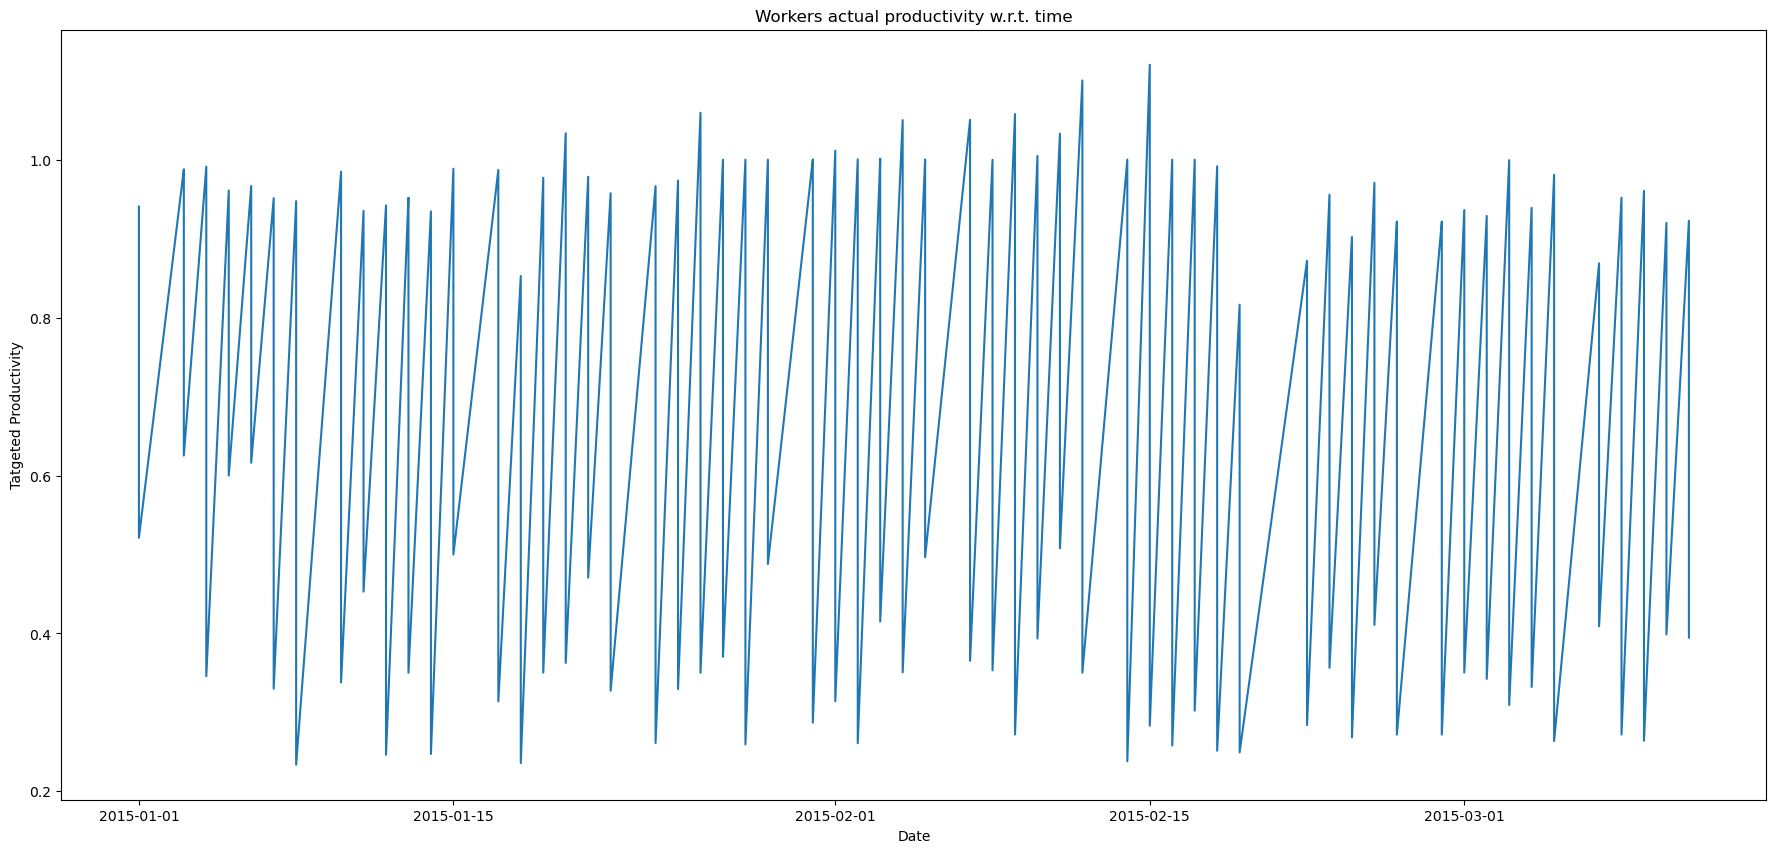

In [40]:
plt.figure(figsize=(22,10))
plt.plot(funnel.Date,funnel["Actual Productivity"])
plt.title("Workers targeted productivity w.r.t. time")
plt.xlabel("Date")
plt.ylabel("Tatgeted Productivity")
plt.show()

In [38]:
funnel

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
5,2015-01-01,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
6,2015-01-01,Q1,Finishing,0.75,960,8.0,0.755167,Yes
7,2015-01-01,Q1,Sewing,0.75,6900,57.5,0.753683,Yes
8,2015-01-01,Q1,Sewing,0.75,6000,55.0,0.753098,Yes
9,2015-01-01,Q1,Sewing,0.75,6900,57.5,0.750428,Yes
10,2015-01-01,Q1,Sewing,0.70,6900,57.5,0.721127,Yes
11,2015-01-01,Q1,Sewing,0.75,6480,54.0,0.712205,No


2. Create a new column called `Target Achieved` (categorical as "**Yes**" if Actual Productivity is greater than Targeted Productivity, and "**No**" otherwise). Then, Complete the below given tasks using the columns : Department, Targeted Productivity, Overtime, Number of Workers, Quarter, and Start and End Dates of the observations in the dataset. And give a summary of  the results. <br><br>

    a) Create grouped bar graphs to show the level of Target achieved( 'yes' and 'No') for the given date range, at a quarterly time interval for both categories. The graph should have appropriate labels, titles and other factors which would make it readable.Also provide a brief interpretation of the graph.
    <br><br>
    b) Forecast the Actual Productivity and create a line graph for the next four quarters using the following algorithms mentioned below and display the values, then create plots for the result achieved using appropriate plots: <br>
      (i) ARIMA <br>
      (ii) Rolling Averages <br><br>
    
    c) Ceate a summary of comparison with the evaluation criteria and their values for each model. You can add more evaluation criteria, which will contribute to your increased chances of selection, but the following are a must have: <br>
    (i) Mean Absolute Percentage Error (MAPE)<br>
    (ii) Mean Squared Error (MSE)

# SECTION 1 - Ques 2(a)

In [48]:
# Creating new column named Target Achieved
funnel['Target Achieved'] = funnel.apply(lambda row: 'Yes' if row['Actual Productivity'] > row['Targeted Productivity'] else 'No', axis=1)

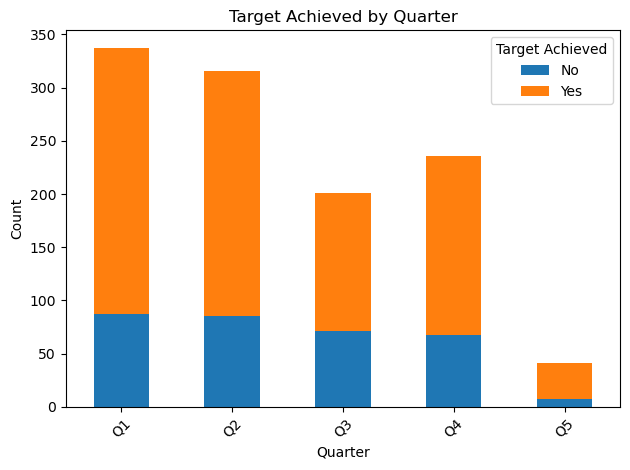

In [25]:
grouped_data = funnel.groupby(['Quarter', 'Target Achieved']).size().unstack()

# Plotting
grouped_data.plot(kind='bar', stacked=True)

# Adding labels and title
plt.title('Target Achieved by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target Achieved')

# Show plot
plt.tight_layout()
plt.show()

# Interpretation of the graph
- The graph illustrates the count of targets achieved ('Yes' and 'No') for each quarter over the given date range.
- Each bar represents a quarter, divided into two parts indicating the count of 'Yes' and 'No' for target achieved.
- By observing the graph, you can discover trends in target achievement over time and compare the performance of different quarters.
- If the ‘yes’ bar is significantly higher, it indicates successful target achievement.
- Conversely, if the ‘no’ bar dominates, it suggests that workers are falling short of their goals.
- This visualization helps in assessing the productivity performance of garment workers over time and identifying quarters where improvements may be necessary.

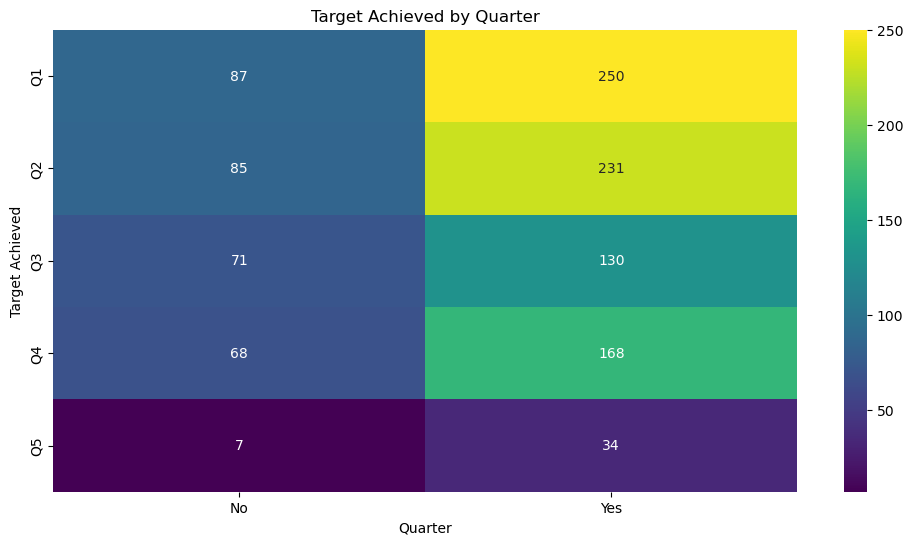

In [26]:
grouped_data = funnel.groupby(['Quarter', 'Target Achieved']).size().unstack()

# Create the grouped bar graph
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_data, cmap='viridis', annot=True, fmt='g')
plt.title('Target Achieved by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Target Achieved')
plt.show()

# Interpretation of graph

- The darker the color, the higher the number of times a target was achieved or not in a given quarter.
- The areas with lighter colors represent the quarters where the target was not achieved as often as it was achieved.
- **This heatmap provides an intuitive way to visualize the level of target achievement for both categories ('Yes' and 'No') at a quarterly time interval. It helps identify trends and patterns in target achievement over time, which can be useful for decision-making and process improvement.**

# SECTION 1 - Ques 2 (b)

C:\Users\pheno\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pheno\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pheno\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\pheno\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


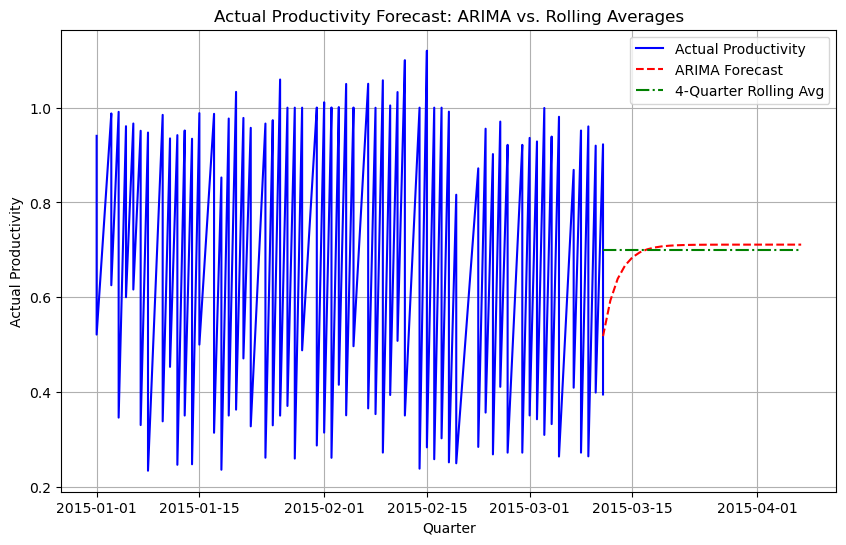

,forecast_arima,rolling avg,date
1131,0.517853,0.508745,2015-03-11
1132,0.593056,0.508745,2015-03-12
1133,0.638988,0.508745,2015-03-13
1134,0.667041,0.508745,2015-03-14
1135,0.684174,0.508745,2015-03-15
1136,0.694639,0.508745,2015-03-16
1137,0.701030,0.508745,2015-03-17
1138,0.704934,0.508745,2015-03-18
1139,0.707318,0.508745,2015-03-19
1140,0.708774,0.508745,2015-03-20


In [69]:
# Extract relevant columns (Date )
new_df = funnel.copy()
new_df.set_index('Date', inplace=True)


# Resample data to quarterly frequency
quarterly_actual = new_df['Actual Productivity']

# ARIMA model
model = ARIMA(quarterly_actual, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next four quarters
forecast_steps = 28
forecast = model_fit.forecast(steps=forecast_steps)

# Create a time index for the forecast
forecast_index = pd.date_range(start=quarterly_actual.index[-1], periods=forecast_steps, freq='D')

# Plotting
plt.figure(figsize=(10, 6))

# Actual Productivity
plt.plot(quarterly_actual.index, quarterly_actual, label='Actual Productivity', color='b')

# ARIMA forecast
plt.plot(forecast_index, forecast, label='ARIMA Forecast', linestyle='--', color='r')

# Calculate rolling average for the last 'n' days
rolling_window = 28  # You can adjust the window size as needed
rolling_avg = new_df['Actual Productivity'].rolling(window=rolling_window).mean()

# Predict next 28 days using the last available rolling average value
last_available_avg = rolling_avg.iloc[-1]
next_28_days_prediction = [last_available_avg] * 28

# Rolling averages
plt.plot(pd.date_range(start='2015-03-11', periods=28, freq='D'), next_28_days_prediction, label=f'{4}-Quarter Rolling Avg', linestyle='-.', color='g')

plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.title('Actual Productivity Forecast: ARIMA vs. Rolling Averages')
plt.legend()
plt.grid(True)
plt.show()

# Displaying forecast values
forecast_val = pd.DataFrame()
forecast_val["forecast_arima"] = forecast
forecast_val["rolling avg"] = [rolling_avg_forecast]*28
forecast_val["date"] = forecast_index
forecast_val.head(28)


# SECTION 1- Ques 2(c)

In [72]:
'''Let’s evaluate the performance of the ARIMA and Rolling Averages models using the specified evaluation criteria:

Mean Absolute Percentage Error (MAPE):
MAPE measures the average percentage difference between the forecasted values and the actual values.
Lower MAPE indicates better accuracy.
Mean Squared Error (MSE):
MSE quantifies the average squared difference between forecasted and actual values.
Smaller MSE values indicate better model performance.
Let’s calculate these metrics for both models:'''

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Assuming you have the actual values and forecasts
# Replace 'actual_values' and 'arima_forecast' with your data
actual_values = new_df["Actual Productivity"].iloc[-forecast_steps:]
arima_forecast = forecast

# Calculate MAPE
mape_arima = mean_absolute_percentage_error(actual_values, arima_forecast)

# Calculate MSE
mse_arima = mean_squared_error(actual_values, arima_forecast)

# Assuming you have the rolling averages
# Replace 'rolling_avg' with your data
rolling_avg_values = rolling_avg[-forecast_steps:]

# Calculate MAPE for rolling averages
mape_rolling = mean_absolute_percentage_error(actual_values, rolling_avg_values)

# Calculate MSE for rolling averages
mse_rolling = mean_squared_error(actual_values, rolling_avg_values)

# Create a summary
summary = pd.DataFrame({
    'Model': ['ARIMA', 'Rolling Averages'],
    'MAPE': [mape_arima, mape_rolling],
    'MSE': [mse_arima, mse_rolling]
})

# Display the summary
print(summary)


'''Lower MAPE and MSE values indicate better performance.'''

              Model      MAPE       MSE
0             ARIMA  0.166360  0.016469
1  Rolling Averages  0.151334  0.014469


'Lower MAPE and MSE values indicate better performance.'

3. You are currently a Data Scientist hired on contract by the organisation. Your performance in this project and your ability to generate data backed insights and strategies will decide if the management approves for a Data Science team to be established officially, with you as the team lead. To present your findings to the management, create a short but detailed PowerPoint presentation which answers the following questions: <br><br>
    a) The organisation currently spends an amount of Rs. 8.4 lakh per quarter, with each department getting half of the amount. Analyze and compare the value brought in by each department in various quarters. Please include appropriate visualizations for an easier understanding of the management. <br><br>(*Department Value* = *Actual Productivity* / *Department Quarterly Spend*). Normalize the computed value to lie in the range of 0-1 for easier interpretation. <br><br>
    b) The organisational budget remains to be Rs. 8.4 lakh per quarter. Suggest an allocation strategy to divide the resources between departments and share your reasoning. (i.e., would you recommend higher allocation to the better performing department or the worse one?)
    


---
# Section 2 - A/B Testing

`ABTest` sheet contains the data from an experiment conducted to optimize the website design by splitting the traffic to the website to the control and experiment groups. The control group was shown a "sign up" button in red and the treatment group was shown it in green.

AB Testing references
 - [A/B Testing Basics](https://towardsdatascience.com/a-b-testing-the-basics-86d6d98525c9) - Medium Article
 - [A/B Testing](https://vwo.com/ab-testing/) - VWO Article

Import data from the `ABTest` sheet of the `AssignmentData.xlsx` file into a dataframe named `abtest` and perform exploratory analysis.

1. Create a timeseries visualization with Date (on x-axis) and Total Number of Clicks (on y-axis) for each device type creating separate trendlines for each device in order to find which device performed best in terms of total number of clicks.

# Data Loading

In [33]:
# Loading the ABTest file as pandas DataFrame
abtest = pd.read_excel('AssignmentData.xlsx', sheet_name='ABTest')
abtest.head()

,Date,Device,Address,Clicks,Visitors,Group
0,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/c...,159,199,Control
1,2023-05-18,Laptop,fyttlyf/business/campaign/get-paid///,18,1413,Experiment
2,2023-05-18,Mobile,fyttlyf/business/campaign/campaigns-business/s...,142,759,Control
3,2023-05-18,Laptop,fyttlyf/business/product/business-financial-se...,126,473,Control
4,2023-05-18,Laptop,fyttlyf/business/product/business-accept-payme...,129,183,Control


In [34]:
desc(abtest)

,type,count,nunique,%unique,null,%null,min,max
Date,datetime64[ns],18099,18,0.099453,0,0.0,2023-05-07 00:00:00,2023-05-24 00:00:00
Device,object,18099,4,0.022101,0,0.0,Laptop,Tablet
Address,object,18099,211,1.165810,0,0.0,fyttlyf//////,main/consappdownload/xsell////APP_REDIRECT/
Clicks,int64,18099,720,3.978120,0,0.0,0,11199
Visitors,int64,18099,1746,9.646942,0,0.0,0,211868
Group,object,18099,2,0.011050,0,0.0,Control,Experiment


# SECTION 2 - Ques 1

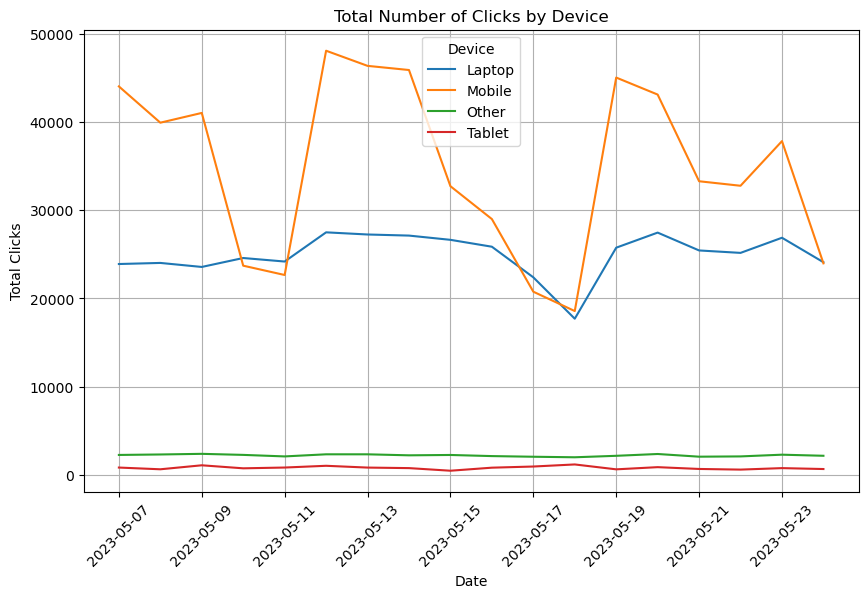

In [35]:
# Group by date and device, summing up the clicks
clicks_by_device = abtest.groupby(['Date', 'Device'])['Clicks'].sum().reset_index()

# Create a time series plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Clicks', hue='Device', data=clicks_by_device)
plt.title('Total Number of Clicks by Device')
plt.xlabel('Date')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Inference from the plot
- Clearly we can observe that "Mobile" performed best in terms of total number of clicks.
- However there are a very few clicks from Tablet and other devices.

2. Assume MDE = 3%, α = 95% and statistical power (1-β) = 80%,. What is the sample size required for the test? (Use this article to supplement your understanding - [Sample Size in A/B Testing](https://guessthetest.com/calculating-sample-size-in-a-b-testing-everything-you-need-to-know/)). Do we have sufficient sample size to conclude the test?

# SECTION 2 - Ques 2

In [38]:

# Given values
MDE = 0.03
alpha = 0.05
power = 0.80

# Create a NormalIndPower object
power_analysis = NormalIndPower()

# Calculate the required sample size
sample_size = power_analysis.solve_power(effect_size=MDE, alpha=alpha, power=power, alternative='larger')

print("Required sample size:", round(sample_size))


Required sample size: 13739


In [40]:
print("Actual sample size:", abtest.shape[0])

Actual sample size: 18099


- Sample size required for test = 13739
- Actual sample size = 18099
- Clearly we can observe that the Actual sample size is greater than the required sample size. Therefore, we have sufficient sample size to conclude the test.

3. Write a function that accepts the following inputs to test your hypothesis at the chosen level of statistical significance:
    - Control Group Visitors
    - Control Group Conversions
    - Treatment Group Visitors
    - Treatment Group Conversions
    - Confidence Level (three options: 90, 95, 99).

  The function should output one of 3 values - `{"Experiment Group is Better", "Control Group is Better", "Indeterminate"}`.<br> Use the function to perform AB Test on the given Data and provide your findings and interpretation of the results.<br><br>
4. Create a simple Streamlit app (you can follow this [tutorial](https://youtu.be/sogNluduBQQ?si=wA5a2wVh4bqeAtmi)) using the function you created that performs the hypothesis test by taking in the above mentioned inputs from the user. Finally, host this app on Streamlit Community Cloud using this [tutorial](https://blog.streamlit.io/host-your-streamlit-app-for-free/).
    
    **Note**: You get bonus points for a neater and more presentable app.


# SECTION 2 - Ques 3

In [2]:

def perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level):
    # Calculate conversion rates for control and treatment groups
    control_conversion_rate = control_conversions / control_visitors
    treatment_conversion_rate = treatment_conversions / treatment_visitors
    
    # Calculate pooled probability
    pooled_prob = (control_conversions + treatment_conversions) / (control_visitors + treatment_visitors)
    
    # Calculate standard error
    standard_error = ((pooled_prob * (1 - pooled_prob)) * ((1 / control_visitors) + (1 / treatment_visitors))) ** 0.5
    
    # Calculate z-score
    z_score = (treatment_conversion_rate - control_conversion_rate) / standard_error
    
    # Determine critical z-value based on confidence level
    if confidence_level == 90:
        critical_z = 1.645
    elif confidence_level == 95:
        critical_z = 1.96
    elif confidence_level == 99:
        critical_z = 2.576
    else:
        raise ValueError("Confidence level must be 90, 95, or 99")
    
    # Compare z-score with critical z-value
    if z_score > critical_z:
        return "Treatment Group is Better"
    elif z_score < -critical_z:
        return "Control Group is Better"
    else:
        return "Indeterminate"


In [43]:
# Test the function with sample data
control_visitors = 1000
control_conversions = 50
treatment_visitors = 1050
treatment_conversions = 60
confidence_level = 95

result = perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print("AB Test Result:", result)


AB Test Result: Indeterminate


# Using pre defined function

In [4]:
import scipy.stats as stats

def perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level=95):
    
    # Calculate conversion rates
    control_rate = control_conversions / control_visitors
    treatment_rate = treatment_conversions / treatment_visitors

    # Perform two-sample t-test
    t_stat, p_value = stats.ttest_ind_from_stats(
        mean1=control_rate,
        std1=0,  # We assume equal variance for simplicity
        nobs1=control_visitors,
        mean2=treatment_rate,
        std2=0,
        nobs2=treatment_visitors
    )

    # Determine significance based on confidence level
    alpha = (100 - confidence_level) / 100
    if p_value < alpha:
        if treatment_rate > control_rate:
            return "Experiment Group is Better"
        else:
            return "Control Group is Better"
    else:
        return "Indeterminate"

# Example usage:
control_visitors = 1000
control_conversions = 80
treatment_visitors = 950
treatment_conversions = 100

confidence_level = 95
result = perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print(f"AB Test Result: {result}")


AB Test Result: Experiment Group is Better


In [47]:
# Test the function with sample data
control_visitors = 1000
control_conversions = 50
treatment_visitors = 1050
treatment_conversions = 60
confidence_level = 95

result = perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print("AB Test Result:", result)


AB Test Result: Experiment Group is Better


# SECTION 2 - Ques 4

In [8]:
import streamlit as st

# Define the Streamlit app
def main():
    st.title("A/B Test Hypothesis Testing App")

    # Input parameters
    st.sidebar.header("Input Parameters")
    control_visitors = st.sidebar.number_input("Control Group Visitors", min_value=1, step=1)
    control_conversions = st.sidebar.number_input("Control Group Conversions", min_value=0, step=1)
    treatment_visitors = st.sidebar.number_input("Treatment Group Visitors", min_value=1, step=1)
    treatment_conversions = st.sidebar.number_input("Treatment Group Conversions", min_value=0, step=1)
    confidence_level = st.sidebar.select_slider("Confidence Level", options=[90, 95, 99])

    # Perform A/B test
    result = perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)

    # Display result
    st.subheader("A/B Test Result:")
    st.write(result)

# Run the app
if __name__ == "__main__":
    main()


---
# Section 3 - Advanced Learning


You can pick one of the following topics to learn more about using the provided resources. The topic you choose will be discussed in depth during the interview process.

  - Multi-Armed Bandit (MAB)<br>
[A brief overview of the Multi-Armed Bandit in Reinforcement Learning](https://medium.com/analytics-vidhya/a-brief-overview-of-the-multi-armed-bandit-in-reinforcement-learning-d086853dc90a)<br>
[Solving the Multi-Armed Bandit Problem](https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c)<br>
[What is the Multi-Armed Bandit Problem?](https://www.optimizely.com/optimization-glossary/multi-armed-bandit/)<br><br>
  - Controlled experiment using Pre-Experiment Data (CUPED)<br>
[Understanding CUPED](https://matteocourthoud.github.io/post/cuped/) <br>
[Understanding how CUPED in GrowthBook Reduces Experiment Runtimes at the Los Angeles Times](https://medium.com/growth-book/understanding-how-cuped-in-growthbook-reduces-experiment-runtimes-at-the-los-angeles-times-79ba7c288d71)<br>
[How Booking.com increases the power of online experiments with CUPED](https://booking.ai/how-booking-com-increases-the-power-of-online-experiments-with-cuped-995d186fff1d)
<br><br>
  - Causal Inference<br>
[Causal Inference as a Blind Spot of Data Scientists](https://dzidas.com/ml/2023/10/15/blind-spot-ds/)<br>
[Causal inference (Part 1 of 3): Understanding the fundamentals](https://medium.com/data-science-at-microsoft/causal-inference-part-1-of-3-understanding-the-fundamentals-816f4723e54a)